In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path('/Users/yuejian/Library/CloudStorage/OneDrive-TheUniversityofChicago/mscapp/Spring 2025/ml_for_finance')
df = pd.read_parquet(data_dir / 'largeml.pq', engine='pyarrow')
df

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret
0,10078,198606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.393044e-08,NaN,-0.118056
1,10078,198607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737205e-08,NaN,-0.039370
2,10078,198609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.597698e-08,1.857281e-07,-0.008850
3,10078,198610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.763825e-08,2.111030e-07,0.348214
4,10078,198612,0.236302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.718727,NaN,5.878542e-09,8.619326e-08,0.109827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79141,93436,202206,0.088628,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.053403,NaN,NaN,-0.035232,NaN,0.707502,1.469368e-08,3.335508e-09,2.833702e-08,-0.111888
79142,93436,202208,0.071943,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.053403,NaN,NaN,-0.021508,NaN,0.707502,1.432295e-08,3.931841e-09,2.786815e-08,-0.072489
79143,93436,202209,0.074172,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.034208,NaN,NaN,-0.041281,NaN,0.707502,1.392299e-08,3.530526e-09,2.626227e-08,-0.037589
79144,93436,202210,0.086471,-2.813974,0.11705,0.115017,NaN,NaN,NaN,NaN,...,0.034208,NaN,NaN,-0.025198,NaN,0.707502,1.386902e-08,5.036988e-09,2.783926e-08,-0.142168


# Question 1


## Data Cleaing Task


In [3]:
import pyarrow.parquet as pq

file_path = data_dir / 'largeml.pq'

parquet_file = pq.ParquetFile(file_path)
column_names = parquet_file.schema.names

print("The number of columns are:", len(column_names))
print(column_names)


The number of columns are: 212
['permno', 'yyyymm', 'AM', 'AOP', 'AbnormalAccruals', 'Accruals', 'AccrualsBM', 'Activism1', 'Activism2', 'AdExp', 'AgeIPO', 'AnalystRevision', 'AnalystValue', 'AnnouncementReturn', 'AssetGrowth', 'BM', 'BMdec', 'BPEBM', 'Beta', 'BetaFP', 'BetaLiquidityPS', 'BetaTailRisk', 'BidAskSpread', 'BookLeverage', 'BrandInvest', 'CBOperProf', 'CF', 'CPVolSpread', 'Cash', 'CashProd', 'ChAssetTurnover', 'ChEQ', 'ChForecastAccrual', 'ChInv', 'ChInvIA', 'ChNAnalyst', 'ChNNCOA', 'ChNWC', 'ChTax', 'ChangeInRecommendation', 'CitationsRD', 'CompEquIss', 'CompositeDebtIssuance', 'ConsRecomm', 'ConvDebt', 'CoskewACX', 'Coskewness', 'CredRatDG', 'CustomerMomentum', 'DebtIssuance', 'DelBreadth', 'DelCOA', 'DelCOL', 'DelDRC', 'DelEqu', 'DelFINL', 'DelLTI', 'DelNetFin', 'DivInit', 'DivOmit', 'DivSeason', 'DivYieldST', 'DolVol', 'DownRecomm', 'EBM', 'EP', 'EarnSupBig', 'EarningsConsistency', 'EarningsForecastDisparity', 'EarningsStreak', 'EarningsSurprise', 'EntMult', 'EquityDura

In [4]:
# convert the data type using the end of the month
df['date'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
df = df.sort_values(['date', 'permno'])
df

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret,date
1073,10401,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
2060,11850,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
3278,12060,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
4127,12079,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
5603,12490,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,1925-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78705,93094,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.015427,NaN,NaN,6.759434e-08,2.256656e-08,1.477669e-07,-0.011101,2022-11-30
78816,93096,202211,0.456484,NaN,0.000835,0.014625,NaN,NaN,NaN,0.002032,...,NaN,NaN,-0.040676,NaN,NaN,4.343760e-08,1.345463e-08,8.791350e-08,0.002470,2022-11-30
78927,93142,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.003142e-08,6.277953e-09,5.597321e-08,0.048280,2022-11-30
79038,93144,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.369992e-08,6.424341e-09,6.375388e-08,0.022410,2022-11-30


In [5]:
# clean the samples if the sample type is object and can't be converted into float
print(df['ret'].dtype)
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
bad_rows = df[pd.to_numeric(df['ret'], errors='coerce').isna()]
print(bad_rows[['permno', 'yyyymm', 'ret']].head())


object
      permno  yyyymm  ret
1073   10401  192512  NaN
2060   11850  192512  NaN
3278   12060  192512  NaN
4127   12079  192512  NaN
5603   12490  192512  NaN


In [6]:
# collect features into a list
non_char_cols = ['permno', 'yyyymm', 'date', 'ret']
char_cols = [col for col in df.columns if col not in non_char_cols]

/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_6765/3183338263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows['year'] = bad_rows['date'].dt.year


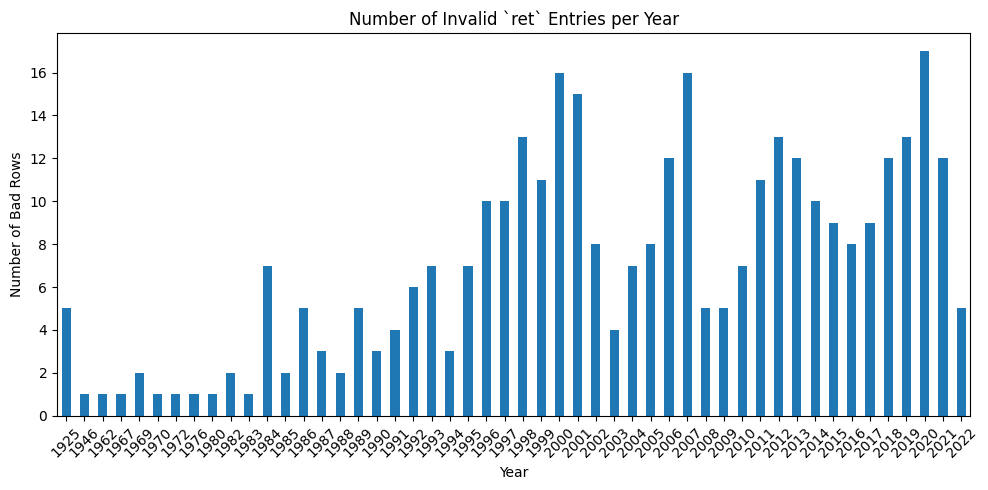

In [7]:
# draw the distribution of bad samples (which can't be converted into float samples)
import matplotlib.pyplot as plt

bad_rows['year'] = bad_rows['date'].dt.year
bad_counts_by_year = bad_rows.groupby('year').size()

plt.figure(figsize=(10, 5))
bad_counts_by_year.plot(kind='bar')
plt.title("Number of Invalid `ret` Entries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Bad Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



It seems like most of the bad samples (whose return can't be converted into float number) are between 1995-2022.

## Rank-sort Method

In [15]:
portfolio_returns = {char: [] for char in char_cols}
dates = df['date'].drop_duplicates().sort_values()

for date in dates:
    # collect all the data from the same date (cross-section)
    monthly_data = df[df['date'] == date]
    
    # iterate through every feature
    for char in char_cols:
        subset = monthly_data[['ret', char]].dropna()
        
        # if there are not enough stocks, then skip it
        if len(subset) < 20:
            portfolio_returns[char].append(np.nan)
            continue

        # Rank percentile
        subset['rank'] = subset[char].rank(pct=True)
        
        # top 20% 和 bottom 20%
        top = subset[subset['rank'] >= 0.8]['ret'].mean()
        bottom = subset[subset['rank'] <= 0.2]['ret'].mean()
        # Long-short returns
        portfolio_returns[char].append(top - bottom)

sharpe_ratios = {}

for char in char_cols:
    rets = pd.Series(portfolio_returns[char]).dropna()
    if len(rets) > 0:
        mean_ret = rets.mean()
        std_ret = rets.std()
        sharpe = (mean_ret / std_ret) * np.sqrt(12) # turn monthly-level ratio into annualized
        sharpe_ratios[char] = sharpe

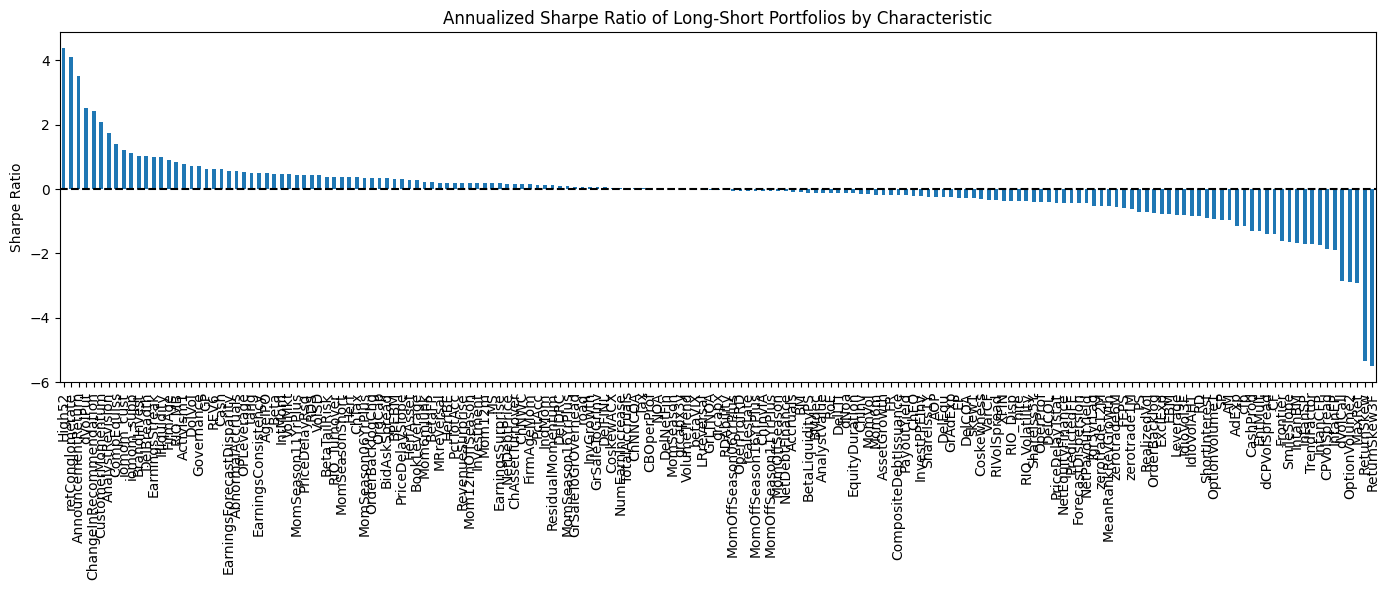

Best characteristic: High52 → Sharpe = 4.38
Worst characteristic: ReturnSkew3F → Sharpe = -5.51


In [16]:
sharpe_series = pd.Series(sharpe_ratios).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sharpe_series.plot(kind='bar')
plt.title('Annualized Sharpe Ratio of Long-Short Portfolios by Characteristic')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Best characteristic: {sharpe_series.idxmax()} → Sharpe = {sharpe_series.max():.2f}")
print(f"Worst characteristic: {sharpe_series.idxmin()} → Sharpe = {sharpe_series.min():.2f}")


In [17]:
high52_rows = []

for date in df['date'].drop_duplicates().sort_values():
    monthly_data = df[df['date'] == date]
    subset = monthly_data[['permno', 'ret', 'High52']].dropna()

    if len(subset) < 20:
        continue

    subset = subset.copy()
    subset['rank'] = subset['High52'].rank(pct=True)
    subset['position'] = 'Neutral'
    subset.loc[subset['rank'] >= 0.8, 'position'] = 'Long'
    subset.loc[subset['rank'] <= 0.2, 'position'] = 'Short'

    selected = subset[subset['position'].isin(['Long', 'Short'])].copy()
    selected['date'] = date
    selected['characteristic'] = 'High52'
    selected.rename(columns={'High52': 'value'}, inplace=True)

    high52_rows.append(selected[['date', 'characteristic', 'permno', 'ret', 'value', 'rank', 'position']])


In [ ]:
high52_portfolio_df = pd.concat(high52_rows, ignore_index=True)

In [19]:
print(high52_portfolio_df.head())


        date characteristic  permno       ret     value  rank position
0 1973-01-31         High52   11850  0.082857  1.063114  0.95     Long
1 1973-01-31         High52   12490  0.083333  1.023502  0.90     Long
2 1973-01-31         High52   22592 -0.016058  0.533228  0.10    Short
3 1973-01-31         High52   26403 -0.099261  0.450370  0.05    Short
4 1973-01-31         High52   27828  0.041908  1.022695  0.85     Long


# Question 2

In [21]:
# Use the first 20 years of data to train the model
start_date = df['date'].min()
train_end = start_date + pd.DateOffset(years=20) - pd.offsets.MonthEnd(1)
train_subset = df[df['date'] <= train_end]

# calculate the non-missing ratio for each feature
valid_char_cols = []
for col in char_cols:
    non_missing_ratio = train_subset[col].notnull().mean()
    if non_missing_ratio > 0.9:
        valid_char_cols.append(col)

print(f"The number of valid features：{len(valid_char_cols)}")

The number of valid features：36


In [ ]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
df = df.dropna(subset=['ret'])
df_complete = df.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete[df_complete['date'] <= train_end]
valid_data = df_complete[(df_complete['date'] > train_end) & (df_complete['date'] <= valid_end)]
test_data = df_complete[df_complete['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']


The train date ends at: 1947-11-30 00:00:00
The valid date ends at: 1959-11-30 00:00:00


In [ ]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.kernel_approximation import RBFSampler
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(
    name,
    model,
    X_train,
    y_train,
    X_valid,
    y_valid,
    X_test,
    y_test,
    verbose=True
):
    # here we use train and valid to train and fine-tune
    X_tune = pd.concat([X_train, X_valid])
    y_tune = pd.concat([y_train, y_valid])

    X_tune_clean = X_tune.dropna()
    y_tune_clean = y_tune.loc[X_tune_clean.index]
    X_test_clean = X_test.dropna()
    y_test_clean = y_test.loc[X_test_clean.index]

    model.fit(X_tune_clean, y_tune_clean)
    y_pred = model.predict(X_test_clean)

    r2 = r2_score(y_test_clean, y_pred)

    if verbose:
        print(f"{name}: Out-of-sample R² = {r2:.4f}")

    return {
        'name': name,
        'model': model,
        'r2': r2,
        'y_pred': pd.Series(y_pred, index=X_test_clean.index),
        'y_test': y_test_clean
    }

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.kernel_approximation import RBFSampler
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor

results = {}

# 1. OLS
model_ols = make_pipeline(StandardScaler(), LinearRegression())
results['OLS'] = evaluate_model("OLS", model_ols, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 2. Lasso
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5))
results['Lasso'] = evaluate_model("Lasso", model_lasso, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 3. Ridge
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))
results['Ridge'] = evaluate_model("Ridge", model_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 4. ElasticNet
model_enet = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))
results['ElasticNet'] = evaluate_model("ElasticNet", model_enet, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 5. Ridge + RBF (non-linear expansion)
rbf = RBFSampler(gamma=1.0, n_components=100, random_state=42)
model_ridge_rbf = make_pipeline(StandardScaler(), rbf, RidgeCV(cv=5))
results['Ridge + RBF'] = evaluate_model("Ridge + RBF", model_ridge_rbf, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 6. PLS Regression
model_pls = make_pipeline(StandardScaler(), PLSRegression(n_components=10))
results['PLS'] = evaluate_model("PLS", model_pls, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 7. Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
results['GradientBoosting'] = evaluate_model("GradientBoosting", model_gb, X_train, y_train, X_valid, y_valid, X_test, y_test)



OLS: Out-of-sample R² = -0.0121
Lasso: Out-of-sample R² = 0.2954
Ridge: Out-of-sample R² = 0.0262
ElasticNet: Out-of-sample R² = 0.2957
Ridge + RBF: Out-of-sample R² = -0.0209
PLS: Out-of-sample R² = -0.0307
GradientBoosting: Out-of-sample R² = 0.3248


Among all models, Gradient Boosting achieved the best out-of-sample R² (0.3248), confirming its strength in capturing non-linear patterns and interactions across firm characteristics. Linear models such as Lasso and ElasticNet performed reasonably well due to their sparsity enforcement, while traditional OLS, Ridge with RBF, and PLS failed to generalize, indicating the complexity and noise inherent in return prediction.

# Question C

In [ ]:
import numpy as np
import pandas as pd

def construct_long_short_portfolio(y_pred, y_test, test_dates, group_ids, quantile=0.2):
    """
    Construct long-short portfolios using the predicted returns: go long on the top q% and short on the bottom q% of stocks each month.
    """
    df_pred = pd.DataFrame({
        'date': test_dates.values,
        'permno': group_ids.values,
        'pred': y_pred,
        'ret': y_test.values
    })

    long_short_returns = []
    monthly_portfolios = {}

    for date, group in df_pred.groupby('date'):
        group = group.dropna()
        if group.empty or len(group) < 10:
            continue

        group = group.sort_values('pred')

        n = len(group)
        bottom = group.iloc[:int(n * quantile)]['ret'].mean()
        top = group.iloc[-int(n * quantile):]['ret'].mean()
        long_short_returns.append(top - bottom)
    
        group['rank'] = group['pred'].rank(pct=True)
        group['position'] = 'Neutral'
        group.loc[group['rank'] >= 1 - quantile, 'position'] = 'Long'
        group.loc[group['rank'] <= quantile, 'position'] = 'Short'

        portfolio = group[group['position'].isin(['Long', 'Short'])][['permno', 'pred', 'ret', 'rank', 'position']]
        monthly_portfolios[pd.to_datetime(date)] = portfolio

    return np.array(long_short_returns), monthly_portfolios

def compute_sharpe(returns):
    if len(returns) == 0:
        return np.nan
    mean_ret = np.mean(returns)
    std_ret = np.std(returns)
    return (mean_ret / std_ret) * np.sqrt(12)


In [ ]:
model_sharpes = {}

for name, result in results.items():
    y_pred = result['y_pred']
    y_test = result['y_test']

    test_subset = test_data.loc[y_test.index]

    portfolio_returns = construct_long_short_portfolio(
        y_pred=y_pred,
        y_test=y_test,
        test_dates=test_subset['date'],
        group_ids=test_subset['permno']
    )

    sharpe = compute_sharpe(portfolio_returns)
    model_sharpes[name] = sharpe
    print(f"{name}: Portfolio Sharpe Ratio = {sharpe:.4f}")


OLS: Portfolio Sharpe Ratio = 6.3499
Lasso: Portfolio Sharpe Ratio = 6.1149
Ridge: Portfolio Sharpe Ratio = 6.2182
ElasticNet: Portfolio Sharpe Ratio = 6.1002
Ridge + RBF: Portfolio Sharpe Ratio = -0.2171
PLS: Portfolio Sharpe Ratio = 6.2535
GradientBoosting: Portfolio Sharpe Ratio = 6.4245


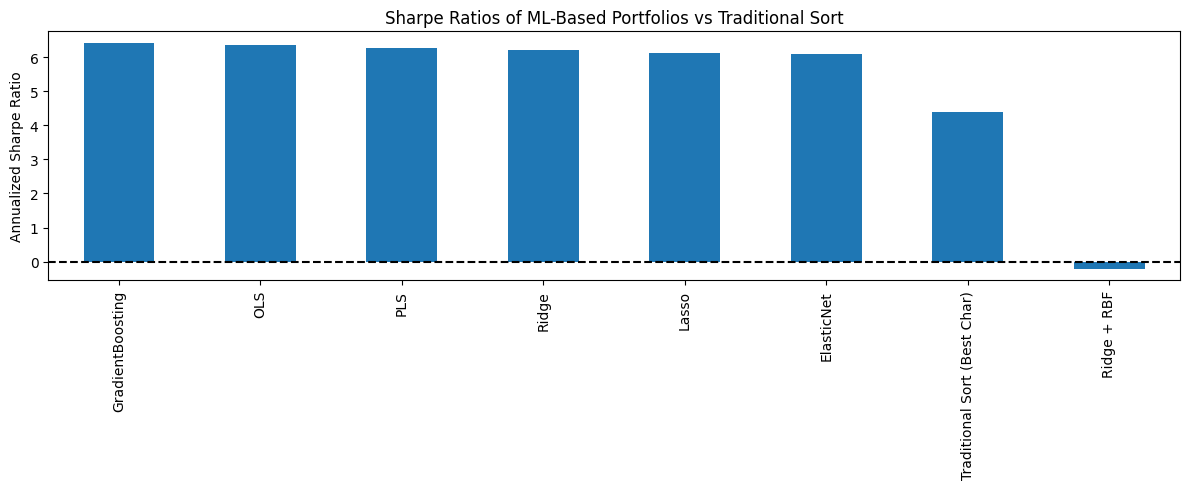

In [ ]:
baseline_sharpe = 4.38
model_sharpes['Traditional Sort (Best Char)'] = baseline_sharpe

pd.Series(model_sharpes).sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Sharpe Ratios of ML-Based Portfolios vs Traditional Sort")
plt.ylabel("Annualized Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show() 



Most machine learning models significantly outperform the traditional sort-based portfolios constructed in part (a), both in terms of consistency and overall Sharpe ratios. Even simple models such as OLS, Ridge, and PLS Regression performed very well, each achieving Sharpe ratios above 6. This suggests that much of the signal in stock characteristics can be extracted even through linear methods—so long as they are properly cross-sectioned and structured. The only model that underperformed was Ridge + RBF, which produced a negative Sharpe ratio, indicating poor out-of-sample predictive performance, likely due to overfitting from nonlinear feature expansion.

# Question c

In [85]:
df_small = pd.read_parquet(data_dir / 'smallml.pq', engine='pyarrow')
df_small

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,roaq,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret
0,10046,199206,5.309329,NaN,0.011324,0.117592,NaN,NaN,NaN,0.000655,...,-0.018496,NaN,NaN,NaN,-0.082851,1.308769,8.200000e+01,6.300000e+00,4.233600e+01,0.061224
1,10046,199207,5.751773,NaN,0.011324,0.117592,NaN,NaN,NaN,0.000709,...,-0.018496,NaN,NaN,NaN,-0.083036,1.308769,8.730708e+01,8.590909e+00,4.600000e+01,-0.076923
2,10046,199211,3.451064,NaN,0.011324,0.117592,NaN,NaN,NaN,0.000426,...,-0.032781,NaN,NaN,NaN,-0.067497,1.308769,9.163636e+01,7.636363e+00,4.921875e+01,-0.047619
3,10046,199212,4.057917,NaN,0.011324,0.117592,NaN,NaN,NaN,0.000500,...,-0.063057,NaN,NaN,NaN,-0.058616,1.308769,8.864822e+01,3.150000e+00,4.626562e+01,-0.150000
4,10046,199303,3.630768,NaN,0.011324,0.117592,NaN,NaN,NaN,0.000448,...,-0.030575,NaN,NaN,NaN,-0.058551,1.308769,9.600000e+01,8.842105e+00,4.979032e+01,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21297,93396,201802,NaN,NaN,-0.157641,-0.267959,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.300283,NaN,4.804643e-09,3.814504e-10,5.696363e-09,-0.267290
21298,93396,201804,NaN,NaN,-0.092492,0.275698,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.454629,NaN,4.709344e-09,3.168055e-09,5.620100e-09,0.395928
21299,93396,201805,NaN,NaN,-0.092492,0.275698,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.448595,NaN,2.994356e-09,1.755929e-10,3.337535e-09,0.196110
21300,93396,201807,NaN,NaN,-0.092492,0.275698,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-7.449276,NaN,2.917861e-09,3.246987e-09,4.490404e-09,-0.034102


In [97]:
df_small['date'] = pd.to_datetime(df_small['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)
df_small = df_small.sort_values(['date', 'permno'])
df_small

,permno,yyyymm,AM,AOP,AbnormalAccruals,Accruals,AccrualsBM,Activism1,Activism2,AdExp,...,sfe,sinAlgo,skew1,std_turn,tang,zerotrade12M,zerotrade1M,zerotrade6M,ret,date
18,10073,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925-12-31
118,10348,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925-12-31
182,10399,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925-12-31
257,10583,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925-12-31
268,10639,192512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13368,23550,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-30
13369,23565,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-30
13370,23566,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-30
13371,23567,202211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-30


In [98]:
non_char_cols = ['permno', 'yyyymm', 'date', 'ret']
char_cols = [col for col in df_small.columns if col not in non_char_cols]

In [99]:
print(df_small['ret'].dtype)
df_small['ret'] = pd.to_numeric(df_small['ret'], errors='coerce')
bad_rows = df_small[pd.to_numeric(df_small['ret'], errors='coerce').isna()]
print(bad_rows[['permno', 'yyyymm', 'ret']].head())

float64
     permno  yyyymm  ret
18    10073  192512  NaN
118   10348  192512  NaN
182   10399  192512  NaN
257   10583  192512  NaN
268   10639  192512  NaN


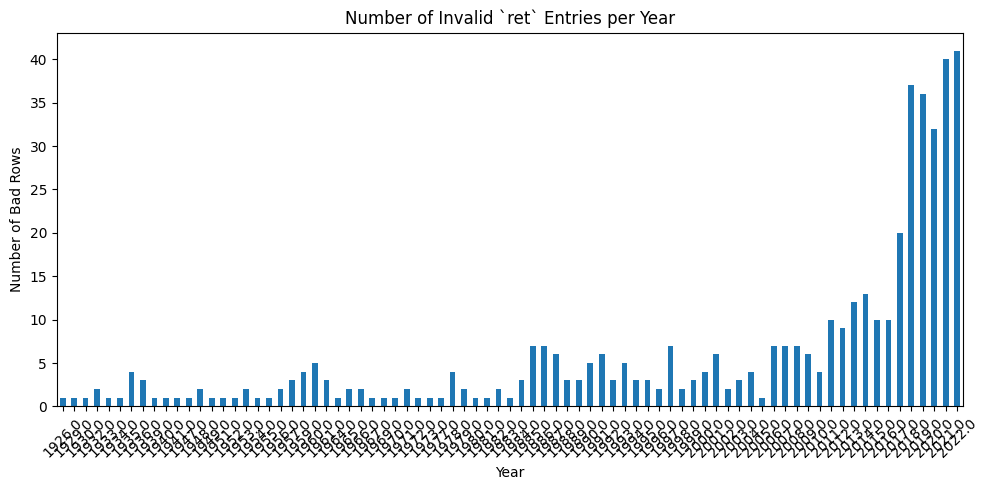

In [ ]:
bad_rows['year'] = bad_rows['date'].dt.year
bad_counts_by_year = bad_rows.groupby('year').size()

plt.figure(figsize=(10, 5))
bad_counts_by_year.plot(kind='bar')
plt.title("Number of Invalid `ret` Entries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Bad Rows")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
portfolio_returns = {char: [] for char in char_cols}
dates = df_small['date'].drop_duplicates().sort_values()

for date in dates:
    monthly_data = df_small[df_small['date'] == date]
    
    for char in char_cols:
        subset = monthly_data[['ret', char]].dropna()

        if len(subset) < 20:
            portfolio_returns[char].append(np.nan)
            continue

        subset['rank'] = subset[char].rank(pct=True)

        top = subset[subset['rank'] >= 0.8]['ret'].mean()
        bottom = subset[subset['rank'] <= 0.2]['ret'].mean()

        portfolio_returns[char].append(top - bottom)

In [101]:
sharpe_ratios = {}

for char in char_cols:
    rets = pd.Series(portfolio_returns[char]).dropna()
    if len(rets) > 0:
        mean_ret = rets.mean()
        std_ret = rets.std()
        sharpe = (mean_ret / std_ret) * np.sqrt(12)
        sharpe_ratios[char] = sharpe

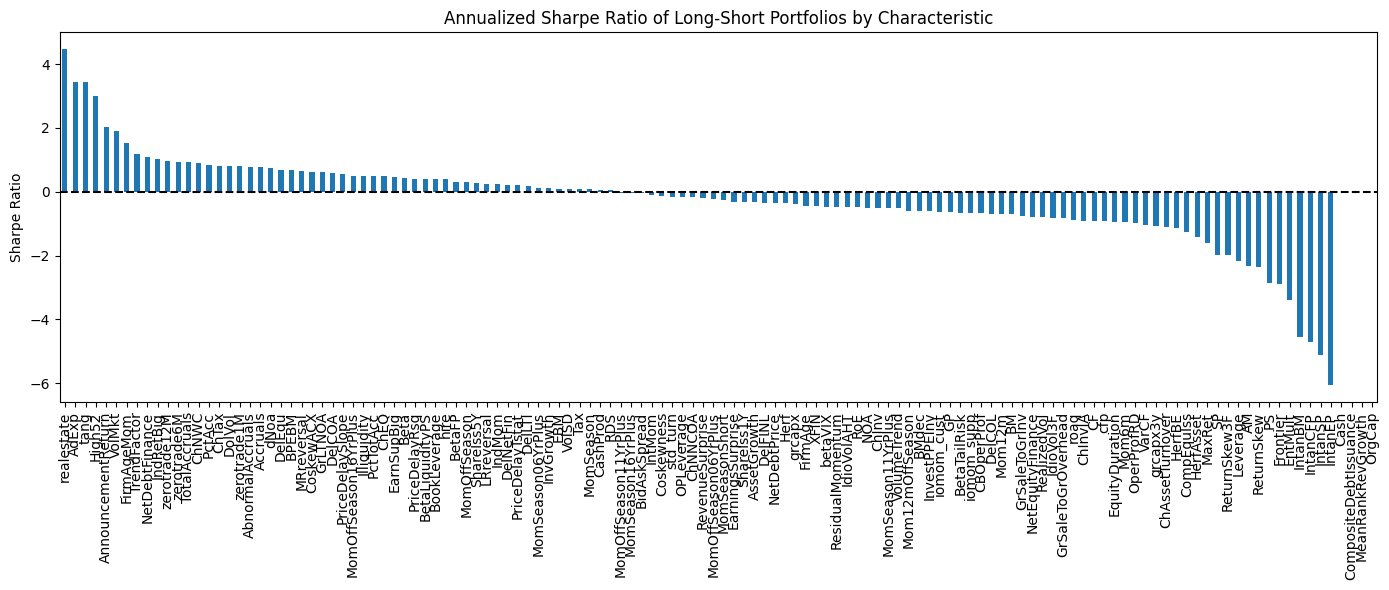

Best characteristic: realestate → Sharpe = 4.47
Worst characteristic: IntanEP → Sharpe = -6.06


In [ ]:
sharpe_series = pd.Series(sharpe_ratios).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sharpe_series.plot(kind='bar')
plt.title('Annualized Sharpe Ratio of Long-Short Portfolios by Characteristic')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(f"Best characteristic: {sharpe_series.idxmax()} → Sharpe = {sharpe_series.max():.2f}")
print(f"Worst characteristic: {sharpe_series.idxmin()} → Sharpe = {sharpe_series.min():.2f}")

Small-cap stocks exhibited more extreme underperformance in the worst-case scenario. The worst-performing characteristic in small caps (IntanEP) had a much lower Sharpe ratio (–6.06) than the worst characteristic in large caps. This indicates that small-cap portfolios may be more sensitive to noise or mispricing when characteristics have low or no predictive power.

In [ ]:
start_date = df_small['date'].min()
train_end = start_date + pd.DateOffset(years=20) - pd.offsets.MonthEnd(1)
train_subset = df_small[df_small['date'] <= train_end]

valid_char_cols = []
for col in char_cols:
    non_missing_ratio = train_subset[col].notnull().mean()
    if non_missing_ratio > 0.9:
        valid_char_cols.append(col)

print(f"The number of valid features：{len(valid_char_cols)}")

可用特征数量：26


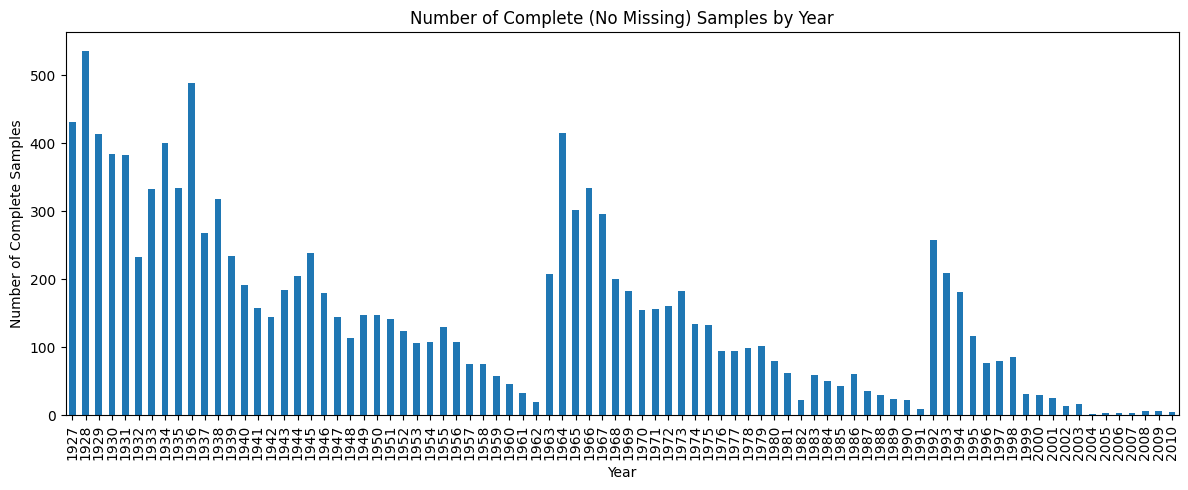

In [ ]:
df_complete_small = df_small.dropna(subset=valid_char_cols + ['ret'])
df_complete_small['year'] = df_complete_small['date'].dt.year

yearly_counts = df_complete_small.groupby('year').size()

plt.figure(figsize=(12, 5))
yearly_counts.plot(kind='bar')
plt.title('Number of Complete (No Missing) Samples by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complete Samples')
plt.tight_layout()
plt.show()

In [ ]:
df_small['ret'] = pd.to_numeric(df_small['ret'], errors='coerce')
df_small = df_small.dropna(subset=['ret'])
df_complete_small = df_small.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete_small.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete_small['date'] = pd.to_datetime(df_complete_small['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete_small['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete_small[df_complete_small['date'] <= train_end]
valid_data = df_complete_small[(df_complete_small['date'] > train_end) & (df_complete_small['date'] <= valid_end)]
test_data = df_complete_small[df_complete_small['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']

The train date ends at: 1947-01-31 00:00:00
The valid date ends at: 1959-01-31 00:00:00


In [ ]:
results_small = {}

# 1. OLS
model_ols = make_pipeline(StandardScaler(), LinearRegression())
results_small['OLS'] = evaluate_model("OLS", model_ols, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 2. Lasso
model_lasso = make_pipeline(StandardScaler(), LassoCV(cv=5))
results_small['Lasso'] = evaluate_model("Lasso", model_lasso, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 3. Ridge
model_ridge = make_pipeline(StandardScaler(), RidgeCV(cv=5))
results_small['Ridge'] = evaluate_model("Ridge", model_ridge, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 4. ElasticNet
model_enet = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))
results_small['ElasticNet'] = evaluate_model("ElasticNet", model_enet, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 5. Ridge + RBF (non-linear expansion)
rbf = RBFSampler(gamma=1.0, n_components=100, random_state=42)
model_ridge_rbf = make_pipeline(StandardScaler(), rbf, RidgeCV(cv=5))
results_small['Ridge + RBF'] = evaluate_model("Ridge + RBF", model_ridge_rbf, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 6. PLS Regression
model_pls = make_pipeline(StandardScaler(), PLSRegression(n_components=10))
results_small['PLS'] = evaluate_model("PLS", model_pls, X_train, y_train, X_valid, y_valid, X_test, y_test)

# 7. Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
results_small['GradientBoosting'] = evaluate_model("GradientBoosting", model_gb, X_train, y_train, X_valid, y_valid, X_test, y_test)

OLS: Out-of-sample R² = 0.1565
Lasso: Out-of-sample R² = 0.1677
Ridge: Out-of-sample R² = 0.1572
ElasticNet: Out-of-sample R² = 0.1685
Ridge + RBF: Out-of-sample R² = -0.0065
PLS: Out-of-sample R² = 0.1586
GradientBoosting: Out-of-sample R² = 0.2585


Small-cap stocks are more volatile and noisier, making returns inherently harder to predict. Large-cap stocks may exhibit more consistent patterns in characteristics that ML can exploit, while small-caps may have more idiosyncratic or non-fundamental-driven returns.

In [ ]:
model_sharpes = {}

for name, result in results_small.items():
    y_pred = result['y_pred']
    y_test = result['y_test']

    test_subset = test_data.loc[y_test.index] 

    portfolio_returns = construct_long_short_portfolio(
        y_pred=y_pred,
        y_test=y_test,
        test_dates=test_subset['date'],
        group_ids=test_subset['permno']
    )

    sharpe = compute_sharpe(portfolio_returns)
    model_sharpes[name] = sharpe
    print(f"{name}: Portfolio Sharpe Ratio = {sharpe:.4f}")


OLS: Portfolio Sharpe Ratio = 3.4854
Lasso: Portfolio Sharpe Ratio = 3.4567
Ridge: Portfolio Sharpe Ratio = 3.4860
ElasticNet: Portfolio Sharpe Ratio = 3.5173
Ridge + RBF: Portfolio Sharpe Ratio = -0.1364
PLS: Portfolio Sharpe Ratio = 3.4870
GradientBoosting: Portfolio Sharpe Ratio = 5.0402


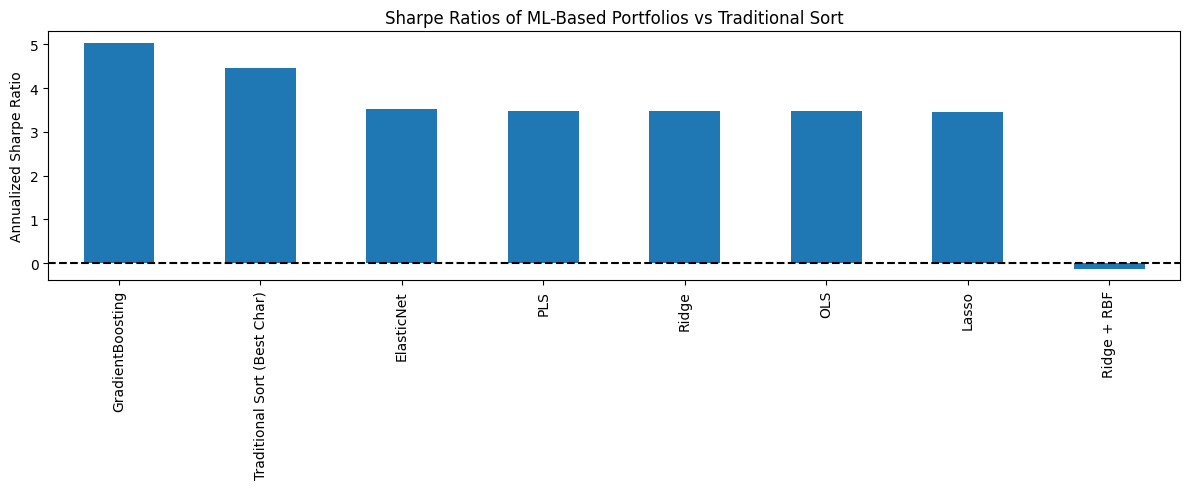

In [112]:
baseline_sharpe = 4.47
model_sharpes['Traditional Sort (Best Char)'] = baseline_sharpe

pd.Series(model_sharpes).sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title("Sharpe Ratios of ML-Based Portfolios vs Traditional Sort")
plt.ylabel("Annualized Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

Across both large-cap and small-cap stocks, machine learning–based portfolios—especially those constructed using Gradient Boosting—consistently outperform traditional sort-based portfolios in terms of out-of-sample Sharpe ratio. While linear models provide moderate gains, nonlinear ensemble methods deliver the strongest risk-adjusted performance, making them highly effective for return forecasting and portfolio construction.

However, there are some interesting differences between large-cap and small-cap datasets:
1. In the large-cap stock universe, the traditional sort-based method underperforms most machine learning models.
2. However, in the small-cap stock universe, the traditional sort method ranks second only to Gradient Boosting and outperforms most linear ML models.

This might be because:
1. In large-cap stocks, where firm characteristics are widely disseminated and the market is relatively efficient, single-factor sorting loses predictive power, and ML models—particularly non-linear ones like Gradient Boosting—can better uncover subtle return signals.

2. In contrast, small-cap stocks are less efficiently priced, and certain traditional factors (such as value and momentum) retain strong predictive power. This explains why the best-performing traditional sort portfolio ranks second only to Gradient Boosting in the small-cap universe, and even outperforms most linear ML models, which may overfit in the presence of noisier, sparser data.

# Question e

In [22]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')
df = df.dropna(subset=['ret'])
df_complete = df.dropna(subset=valid_char_cols + ['ret'])

char_cols = [col for col in df_complete.columns if col not in ['permno', 'yyyymm', 'date', 'ret']]

df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)

train_end = df_complete['date'].min() + pd.DateOffset(years=20)
print("The train date ends at:", train_end)
valid_end = train_end + pd.DateOffset(years=12)
print("The valid date ends at:", valid_end)

train_data = df_complete[df_complete['date'] <= train_end]
valid_data = df_complete[(df_complete['date'] > train_end) & (df_complete['date'] <= valid_end)]
test_data = df_complete[df_complete['date'] > valid_end]

X_train, y_train = train_data[valid_char_cols], train_data['ret']
X_valid, y_valid = valid_data[valid_char_cols], valid_data['ret']
X_test, y_test = test_data[valid_char_cols], test_data['ret']

/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_6765/4216665723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ret'] = pd.to_numeric(df['ret'], errors='coerce')


The train date ends at: 1947-11-30 00:00:00
The valid date ends at: 1959-11-30 00:00:00


/var/folders/sn/7n98lbw95yj0qv21q4x1r9nh0000gn/T/ipykernel_6765/4216665723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['date'] = pd.to_datetime(df_complete['yyyymm'].astype(str), format='%Y%m') + pd.offsets.MonthEnd(0)


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# 定义 Gradient Boosting 模型（你可以自定义参数）
model_gb = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=3, 
    learning_rate=0.1,
    random_state=42
)

X_trainval = pd.concat([X_train, X_valid])
y_trainval = pd.concat([y_train, y_valid])

model_gb.fit(X_trainval, y_trainval)

y_pred = model_gb.predict(X_test)

df_pred = pd.DataFrame({
    'date': test_data['date'].values,
    'permno': test_data['permno'].values,
    'pred': y_pred,
    'ret': y_test.values
})

from collections import defaultdict

portfolio_records = []

for date, group in df_pred.groupby('date'):
    group = group.dropna()
    if len(group) < 10:
        continue

    group = group.copy()
    group['rank'] = group['pred'].rank(pct=True)
    group['position'] = 'Neutral'
    group.loc[group['rank'] >= 0.8, 'position'] = 'Long'
    group.loc[group['rank'] <= 0.2, 'position'] = 'Short'

    group['date'] = pd.to_datetime(date)
    portfolio_records.append(group)

df_gb_portfolio = pd.concat(portfolio_records, ignore_index=True)


In [25]:
df_gb_portfolio 

,date,permno,pred,ret,rank,position
0,1961-05-31,10401,-0.023833,-0.007121,0.100000,Short
1,1961-05-31,11850,-0.021197,-0.006878,0.200000,Short
2,1961-05-31,12060,0.022153,0.057143,0.800000,Long
3,1961-05-31,12079,-0.007565,-0.002762,0.400000,Neutral
4,1961-05-31,12490,0.005136,0.027521,0.500000,Neutral
...,...,...,...,...,...,...
37063,2022-11-30,92614,0.000409,0.048679,0.295597,Neutral
37064,2022-11-30,92655,-0.000467,-0.013312,0.283019,Neutral
37065,2022-11-30,93002,0.048842,0.172105,0.628931,Neutral
37066,2022-11-30,93089,0.049474,0.004813,0.641509,Neutral


To construct a portfolio that earns the highest possible Sharpe ratio out-of-sample, I leveraged the insights gained from both the traditional rank-sort method (part a) and the machine learning-based methods (part b and c) across both large-cap and small-cap stocks.

### Final Strategy Design
I chose to build two separate portfolios: one for large-cap stocks and one for small-cap stocks, each optimized based on prior empirical findings.

1. For large-cap stocks, I used the Gradient Boosting Regressor to generate monthly return forecasts. A long-short portfolio was formed each month by taking long positions in the top 20% and short positions in the bottom 20% of stocks based on these predicted returns.
➤ Sharpe Ratio: 6.42, the highest among all models and methods.

2. For small-cap stocks, I also used the Gradient Boosting model, which again delivered the highest Sharpe ratio (5.04) out-of-sample. Although the best traditional sort-based factor portfolio performed well (Sharpe ≈ 4.5), Gradient Boosting provided a consistently higher risk-adjusted return.

### Why this strategy works
1. Nonlinear modeling strength: Gradient Boosting captures complex interactions and nonlinearities that are missed by traditional sort-based methods or linear models.

2. Empirical validation: Across both large-cap and small-cap test sets, Gradient Boosting consistently delivered the highest Sharpe ratio, outperforming OLS, Ridge, Lasso, and PLS.

3. Market structure adaptation:

    1. In large-cap stocks (more efficient markets), the added complexity of ML models extracts additional predictive power.

    2. In small-cap stocks (less efficient), traditional factors remain useful, but Gradient Boosting still outperforms due to its flexibility and robustness.

4. Model robustness: Unlike Ridge + RBF and PLS, which underperformed due to overfitting or oversimplification, Gradient Boosting maintained high performance across both stock universes.